NOTA: O SEGUINTE PROGRAMA MOSTRA O RESULTADO IMPORTANTE NO FINAL: região de exclusão de Mphi vs lambda sem nenhum reescalonamento.

***
# <span style="color:green"> Project: Constraints on Light Dark Scalars Using </span> ${e}^{-}{e}^{+}$ <span style="color:green"> collisions </span>
*** 

The following plots are based on https://arxiv.org/pdf/2207.07476

### (Fig. 6) Electron Data: ${e}^{-}{e}^{+} \rightarrow {\tau}^{-}{\tau}^{+}{\phi}_{L}, {\phi}_{L} \rightarrow {e}^{-}{e}^{+}$

<img src="electrondata.png" alt="Electron Data" width="500" height="300">

### (Fig. 6) Muon Data: ${e}^{-}{e}^{+} \rightarrow {\tau}^{-}{\tau}^{+}{\phi}_{L}, {\phi}_{L} \rightarrow {\mu}^{-}{\mu}^{+}$

<img src="muondata.png" alt="Muon Data" width="500" height="300">

### (Fig. 7) Comparation between other experiments

<img src="comparation.png" alt="Muon Data" width="500" height="300">



In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from matplotlib import rc
#rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
#rc('text', usetex=True)
#rc('text.latex', preamble=r'\usepackage{amsmath}')
#from latex2sympy2 import latex2sympy, latex2latex

## <span style="color:green"> Data and Constants</span>

In [54]:
############################################
# # # # # General constants in GeV # # # # #
############################################
#
GeV = 1
keV = 0.000001*GeV
MeV = 0.001*GeV
TeV = 1000*GeV
Wmass = 80.377*GeV
Zmass = 91.1876*GeV
hmass = 125.25*GeV
electronmass = 0.51099895*MeV
muonmass = 105.6583755*MeV
taumass = 1776.86*MeV
uquarkmass = 2.16*MeV
dquarkmass = 4.67*MeV
squarkmass = 93.4*MeV
cquarkmass = 1.27*GeV
bquarkmass = 4.18*GeV
tquarkmass = 172.69*GeV
vev = 246*GeV
############################################

observed_electron = pd.read_csv('blackline_data.csv') # Taken from Fig. 6

expected_electron = pd.read_csv('dotline_data.csv') # Taken from Fig. 6

observed_muon = pd.read_csv('muondata.csv') # Taken from Fig. 6

simulationdata_electrons = pd.read_csv('scan_results_for_project_leptoscalar_electrons.csv') # Simulation

simulationdata_muon = pd.read_csv('scan_results_for_project_leptoscalar_muons.csv') # Simulation

datos_faltantes = pd.read_csv('datos_faltantes.csv') # Simulation

## <span style="color:green"> Electron analysis</span>

This code is for visualization of the excluded and not excluded regions.

In [55]:
excluded_electron = []

according_electron = []

coupling_electron = []

x1 = observed_electron["invariantmass"].values
y1 = observed_electron["xsecobserved"].values
x2 = simulationdata_electrons["Y"][580:600].values
y2 = simulationdata_electrons["xsection"][580:600].values
y2 = 1000*y2
coupling_electron = simulationdata_electrons["X"][580:600].mean()


# A common x-axis
x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), num=1000)

# Interpolation
y1_interp = np.interp(x_common, x1, y1)
y2_interp = np.interp(x_common, x2, y2)


differences = y1_interp - y2_interp

# In this line is search the region where function 1>function 2
greater_indices_func1 = np.where(differences > 0)[0]

# Here I find the interval where the difference are positive
intervals_func1 = []
if len(greater_indices_func1) > 0:
    start_index = greater_indices_func1[0]
    for i in range(1, len(greater_indices_func1)):
        if greater_indices_func1[i] != greater_indices_func1[i - 1] + 1:
            end_index = greater_indices_func1[i - 1]
            intervals_func1.append((x_common[start_index], x_common[end_index]))
            start_index = greater_indices_func1[i]
    intervals_func1.append((x_common[start_index], x_common[greater_indices_func1[-1]]))


# Print the intervals where function 1 > function 2
print("intervals where function 1 > function 2:")
for interval in intervals_func1:
    print(interval)
    according_electron.append(interval)

# In this line is search the region where function 2>function 1
greater_indices_func2 = np.where(differences < 0)[0]

# Here I find the interval where the difference are negative
intervals_func2 = []
if len(greater_indices_func2) > 0:
    start_index = greater_indices_func2[0]
    for i in range(1, len(greater_indices_func2)):
        if greater_indices_func2[i] != greater_indices_func2[i - 1] + 1:
            end_index = greater_indices_func2[i - 1]
            intervals_func2.append((x_common[start_index], x_common[end_index]))
            start_index = greater_indices_func2[i]
    intervals_func2.append((x_common[start_index], x_common[greater_indices_func2[-1]]))



# Print the intervals where function 2 > function 1
print("intervals where function 2 > function 1:")
for interval in intervals_func2:
    print(interval)
    excluded_electron.append(interval)

plt.figure(figsize=(8, 4))
plt.semilogy(x1, y1, label='Observed', color='blue')
plt.semilogy(x2, y2, label='Leptoscalar model', color='red')

# Resaltar las regiones donde la función 1 es mayor que la función 2
for interval in intervals_func1:
    plt.axvspan(interval[0], interval[1], color='green', alpha=0.3, label='Not Excluded')

# Resaltar las regiones donde la función 2 es mayor que la función 1
for interval in intervals_func2:
    plt.axvspan(interval[0], interval[1], color='yellow', alpha=0.3, label='Excluded')

# Eliminar etiquetas duplicadas en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlim(0.03, 2*muonmass)
plt.ylim(3e-1, 1e1)

plt.xlabel(r'$m_{\phi_{L}}$')
plt.ylabel(r'$\sigma({e}^{+}{e}^{-}\rightarrow{\tau}^{+}{\tau}^{-}\phi_{L},\phi_{L}\rightarrow{e}^{+}{e}^{-}$)')
plt.title('Electron final state upper limits')
plt.grid(True)
#plt.savefig('electron_excluded.pdf')
plt.show()


intervals where function 1 > function 2:
(0.0407549411383518, 0.05345502647047083)
(0.06361509473616606, 0.0822418865566073)
intervals where function 2 > function 1:
(0.05362436094156575, 0.06344576026507114)
(0.08241122102770224, 0.2099200777621773)


This code extract the mass intervals where the region is excluded. 

In [56]:
excluded_electron = []

according_electron = []

coupling_electron = []

s = list(range(20, len(simulationdata_electrons["Y"].values)+1,20))
x1 = observed_electron["invariantmass"].values
y1 = observed_electron["xsecobserved"].values
for i in s:
    x2 = simulationdata_electrons["Y"][i-20:i].values
    y2 = simulationdata_electrons["xsection"][i-20:i].values
    y2 = 1000*y2
    meancoupling = simulationdata_electrons["X"][i-20:i].mean()
    # A common x-axis
    x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), num=1000)
    
    # Interpolation
    y1_interp = np.interp(x_common, x1, y1)
    y2_interp = np.interp(x_common, x2, y2)


    differences = y1_interp - y2_interp

    # In this line is search the region where function 1>function 2
    greater_indices_func1 = np.where(differences > 0)[0]

    # Here I find the interval where the difference are positive
    intervals_func1 = []
    if len(greater_indices_func1) > 0:
        start_index = greater_indices_func1[0]
        for i in range(1, len(greater_indices_func1)):
            if greater_indices_func1[i] != greater_indices_func1[i - 1] + 1:
                end_index = greater_indices_func1[i - 1]
                intervals_func1.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func1[i]
        intervals_func1.append((x_common[start_index], x_common[greater_indices_func1[-1]]))


    # Print the intervals where function 1 > function 2
    #print("intervals where function 1 > function 2:")
    for interval in intervals_func1:
        #print(interval)
        according_electron.append(interval)

    # In this line is search the region where function 2>function 1
    greater_indices_func2 = np.where(differences < 0)[0]

    # Here I find the interval where the difference are negative
    intervals_func2 = []
    if len(greater_indices_func2) > 0:
        start_index = greater_indices_func2[0]
        for i in range(1, len(greater_indices_func2)):
            if greater_indices_func2[i] != greater_indices_func2[i - 1] + 1:
                end_index = greater_indices_func2[i - 1]
                intervals_func2.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func2[i]
        intervals_func2.append((x_common[start_index], x_common[greater_indices_func2[-1]]))



    # Print the intervals where function 2 > function 1
    #print("intervals where function 2 > function 1:")
    for interval in intervals_func2:
        print(interval)
        excluded_electron.append(interval)
        coupling_electron.append(meancoupling)


df_excluded_electron = pd.DataFrame(excluded_electron, columns=['mass1', 'mass2'])
df_excluded_electron['coupling_electron'] = coupling_electron
df_excluded_electron

(0.15878106749151136, 0.1609824156157453)
(0.15827306407822658, 0.161659753500125)
(0.1575957261938469, 0.16233709138450467)
(0.2097507432910824, 0.2099200777621773)
(0.13896893437340566, 0.13998494119997518)
(0.15725705725165706, 0.16284509479778944)
(0.20873473646451288, 0.2099200777621773)
(0.09934466813719428, 0.10002200602157396)
(0.1376142586046463, 0.14066227908435486)
(0.15691838830946722, 0.1633530982110742)
(0.1899386101729767, 0.19010794464407163)
(0.20788806410903826, 0.2099200777621773)
(0.09832866131062475, 0.10069934390595364)
(0.13659825177807677, 0.14150895143982947)
(0.15641038489618245, 0.16386110162435896)
(0.1890919378175021, 0.1907852825284513)
(0.20704139175356367, 0.2099200777621773)
(0.09731265448405522, 0.10137668179033332)
(0.13575157942260216, 0.14201695485311422)
(0.1560717159539926, 0.1643691050376437)
(0.18807593099093256, 0.191462620412831)
(0.20602538492699415, 0.2099200777621773)
(0.09612731318639078, 0.10222335414580791)
(0.13490490706712757, 0.142524

mass1     mass2  coupling_electron
0    0.158781  0.160982           0.002000
1    0.158273  0.161660           0.002082
2    0.157596  0.162337           0.002164
3    0.209751  0.209920           0.002164
4    0.138969  0.139985           0.002246
..        ...       ...                ...
115  0.077331  0.209920           0.005036
116  0.045158  0.068864           0.005118
117  0.075469  0.209920           0.005118
118  0.044142  0.069711           0.005200
119  0.073436  0.209920           0.005200

[120 rows x 3 columns]

## <span style="color:green"> Muon analysis</span>

This code is for visualization of the excluded and not excluded regions.

intervals where function 1 > function 2:
(0.2228939136652069, 2.0)
intervals where function 2 > function 1:


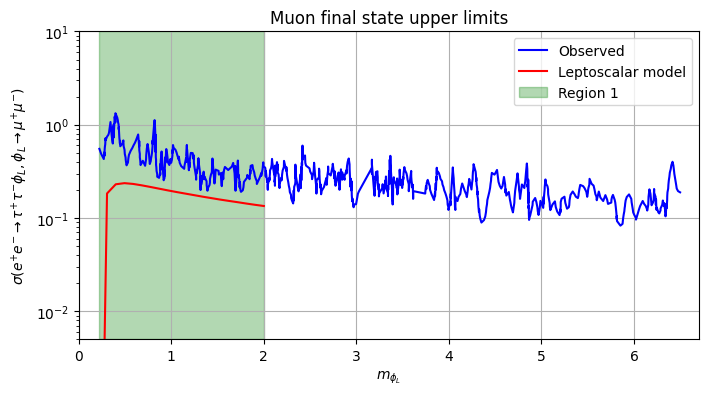

In [57]:
excluded_muon = []

according_muon = []

coupling_muon = []

x1 = observed_muon["invariantmass"].values
y1 = observed_muon["xsecobserved"].values

#x2 = simulationdata_muon["Y"][580:600].values
#y2 = simulationdata_muon["xsection"][580:600].values
x2 = datos_faltantes["Y"][0:20].values
y2 = datos_faltantes["xsection"][0:20].values


y2 = 1000*y2
coupling_muon = datos_faltantes["X"][0:20].mean()
#coupling_muon = simulationdata_muon["X"][580:600].mean()

# A common x-axis
x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), num=1000)

# Interpolation
y1_interp = np.interp(x_common, x1, y1)
y2_interp = np.interp(x_common, x2, y2)


differences = y1_interp - y2_interp

# In this line is search the region where function 1>function 2
greater_indices_func1 = np.where(differences > 0)[0]

# Here I find the interval where the difference are positive
intervals_func1 = []
if len(greater_indices_func1) > 0:
    start_index = greater_indices_func1[0]
    for i in range(1, len(greater_indices_func1)):
        if greater_indices_func1[i] != greater_indices_func1[i - 1] + 1:
            end_index = greater_indices_func1[i - 1]
            intervals_func1.append((x_common[start_index], x_common[end_index]))
            start_index = greater_indices_func1[i]
    intervals_func1.append((x_common[start_index], x_common[greater_indices_func1[-1]]))


# Print the intervals where function 1 > function 2
print("intervals where function 1 > function 2:")
for interval in intervals_func1:
    print(interval)
    according_muon.append(interval)

# In this line is search the region where function 2>function 1
greater_indices_func2 = np.where(differences < 0)[0]

# Here I find the interval where the difference are negative
intervals_func2 = []
if len(greater_indices_func2) > 0:
    start_index = greater_indices_func2[0]
    for i in range(1, len(greater_indices_func2)):
        if greater_indices_func2[i] != greater_indices_func2[i - 1] + 1:
            end_index = greater_indices_func2[i - 1]
            intervals_func2.append((x_common[start_index], x_common[end_index]))
            start_index = greater_indices_func2[i]
    intervals_func2.append((x_common[start_index], x_common[greater_indices_func2[-1]]))



# Print the intervals where function 2 > function 1
print("intervals where function 2 > function 1:")
for interval in intervals_func2:
    print(interval)
    excluded_muon.append(interval)

plt.figure(figsize=(8, 4))
plt.semilogy(x1, y1, label='Observed', color='blue')
plt.semilogy(x2, y2, label='Leptoscalar model', color='red')

# Resaltar las regiones donde la función 1 es mayor que la función 2
for interval in intervals_func1:
    plt.axvspan(interval[0], interval[1], color='green', alpha=0.3, label='Region 1')

# Resaltar las regiones donde la función 2 es mayor que la función 1
for interval in intervals_func2:
    plt.axvspan(interval[0], interval[1], color='yellow', alpha=0.3, label='Region 2')

# Eliminar etiquetas duplicadas en la leyenda
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlim(0, 6.7*GeV)
#plt.xlim(2*muonmass, 2.1*muonmass)
plt.ylim(0.5e-2, 1e1)
#plt.ylim(0.5e-8, 0.5e-2)

plt.xlabel(r'$m_{\phi_{L}}$')
plt.ylabel(r'$\sigma({e}^{+}{e}^{-}\rightarrow{\tau}^{+}{\tau}^{-}\phi_{L},\phi_{L}\rightarrow{\mu}^{+}{\mu}^{-}$)')
plt.title('Muon final state upper limits')
plt.grid(True)
#plt.savefig('muon_excluded.pdf')
plt.show()


This code extract the mass intervals where the region is excluded. 

In [58]:
excluded_muon = []

according_muon = []

coupling_muon = []

s = list(range(20, len(simulationdata_muon["Y"].values)+1,20))
x1 = observed_muon["invariantmass"].values
y1 = observed_muon["xsecobserved"].values
for i in s:
    x2 = simulationdata_muon["Y"][i-20:i].values
    y2 = simulationdata_muon["xsection"][i-20:i].values
    y2 = 1000*y2
    meancoupling = simulationdata_muon["X"][i-20:i].mean()
    # A common x-axis
    x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), num=1000)
    
    # Interpolation
    y1_interp = np.interp(x_common, x1, y1)
    y2_interp = np.interp(x_common, x2, y2)


    differences = y1_interp - y2_interp

    # In this line is search the region where function 1>function 2
    greater_indices_func1 = np.where(differences > 0)[0]

    # Here I find the interval where the difference are positive
    intervals_func1 = []
    if len(greater_indices_func1) > 0:
        start_index = greater_indices_func1[0]
        for i in range(1, len(greater_indices_func1)):
            if greater_indices_func1[i] != greater_indices_func1[i - 1] + 1:
                end_index = greater_indices_func1[i - 1]
                intervals_func1.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func1[i]
        intervals_func1.append((x_common[start_index], x_common[greater_indices_func1[-1]]))


    # Print the intervals where function 1 > function 2
    #print("intervals where function 1 > function 2:")
    for interval in intervals_func1:
        #print(interval)
        according_muon.append(interval)

    # In this line is search the region where function 2>function 1
    greater_indices_func2 = np.where(differences < 0)[0]

    # Here I find the interval where the difference are negative
    intervals_func2 = []
    if len(greater_indices_func2) > 0:
        start_index = greater_indices_func2[0]
        for i in range(1, len(greater_indices_func2)):
            if greater_indices_func2[i] != greater_indices_func2[i - 1] + 1:
                end_index = greater_indices_func2[i - 1]
                intervals_func2.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func2[i]
        intervals_func2.append((x_common[start_index], x_common[greater_indices_func2[-1]]))



    # Print the intervals where function 2 > function 1
    #print("intervals where function 2 > function 1:")
    for interval in intervals_func2:
        print(interval)
        excluded_muon.append(interval)
        coupling_muon.append(meancoupling)


df_excluded_muon = pd.DataFrame(excluded_muon, columns=['mass1', 'mass2'])
df_excluded_muon['coupling_muon'] = coupling_muon
df_excluded_muon




excluded_muon = []

according_muon = []

coupling_muon = []

s = list(range(20, len(datos_faltantes["Y"].values)+1,20))
x1 = observed_muon["invariantmass"].values
y1 = observed_muon["xsecobserved"].values
for i in s:
    x2 = datos_faltantes["Y"][i-20:i].values
    y2 = datos_faltantes["xsection"][i-20:i].values
    y2 = 1000*y2
    meancoupling = datos_faltantes["X"][i-20:i].mean()
    # A common x-axis
    x_common = np.linspace(max(min(x1), min(x2)), min(max(x1), max(x2)), num=1000)
    
    # Interpolation
    y1_interp = np.interp(x_common, x1, y1)
    y2_interp = np.interp(x_common, x2, y2)


    differences = y1_interp - y2_interp

    # In this line is search the region where function 1>function 2
    greater_indices_func1 = np.where(differences > 0)[0]

    # Here I find the interval where the difference are positive
    intervals_func1 = []
    if len(greater_indices_func1) > 0:
        start_index = greater_indices_func1[0]
        for i in range(1, len(greater_indices_func1)):
            if greater_indices_func1[i] != greater_indices_func1[i - 1] + 1:
                end_index = greater_indices_func1[i - 1]
                intervals_func1.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func1[i]
        intervals_func1.append((x_common[start_index], x_common[greater_indices_func1[-1]]))


    # Print the intervals where function 1 > function 2
    #print("intervals where function 1 > function 2:")
    for interval in intervals_func1:
        #print(interval)
        according_muon.append(interval)

    # In this line is search the region where function 2>function 1
    greater_indices_func2 = np.where(differences < 0)[0]

    # Here I find the interval where the difference are negative
    intervals_func2 = []
    if len(greater_indices_func2) > 0:
        start_index = greater_indices_func2[0]
        for i in range(1, len(greater_indices_func2)):
            if greater_indices_func2[i] != greater_indices_func2[i - 1] + 1:
                end_index = greater_indices_func2[i - 1]
                intervals_func2.append((x_common[start_index], x_common[end_index]))
                start_index = greater_indices_func2[i]
        intervals_func2.append((x_common[start_index], x_common[greater_indices_func2[-1]]))



    # Print the intervals where function 2 > function 1
    #print("intervals where function 2 > function 1:")
    for interval in intervals_func2:
        print(interval)
        excluded_muon.append(interval)
        coupling_muon.append(meancoupling)


df_excluded_muon_faltante = pd.DataFrame(excluded_muon, columns=['mass1', 'mass2'])
df_excluded_muon_faltante['coupling_muon'] = coupling_muon
df_excluded_muon_faltante

(0.851085605222704, 0.869931355969429)
(0.9201866912940289, 0.9264686082096036)
(1.3850485430465767, 1.4101762107088764)
(1.749399724149925, 1.7682454748966498)
(2.295926495804948, 2.314772246551673)
(2.9680916057714697, 2.9806554396026197)
(4.343831410282388, 4.368959077944688)
(0.844803688307129, 0.8762132728850041)
(0.9139047743784539, 0.9264686082096036)
(1.315947456975252, 1.3285112908064018)
(1.3850485430465767, 1.4164581276244514)
(1.4667134629490512, 1.4667134629490512)
(1.749399724149925, 1.7745273918122249)
(2.289644578889373, 2.321054163467248)
(2.9618096888558947, 2.9995011903493447)
(4.337549493366813, 4.387804828691413)
(0.844803688307129, 0.8762132728850041)
(0.9139047743784539, 0.9264686082096036)
(1.315947456975252, 1.3347932077219768)
(1.3662027922998516, 1.4164581276244514)
(1.4667134629490512, 1.4667134629490512)
(1.5420964659359508, 1.5483783828515258)
(1.736835890318775, 1.7808093087277999)
(2.283362661973798, 2.321054163467248)
(2.9555277719403197, 3.005783107264

mass1     mass2  coupling_muon
0    0.849061  0.868629       0.002779
1    0.916659  0.925553       0.002779
2    1.316908  1.316908       0.002779
3    1.382727  1.407631       0.002779
4    1.694032  1.694032       0.002779
..        ...       ...            ...
133  0.822378  2.000000       0.005432
134  0.254914  0.395446       0.005621
135  0.406119  2.000000       0.005621
136  0.253135  2.000000       0.005811
137  0.251356  2.000000       0.006000

[138 rows x 3 columns]

## <span style="color:green"> Comparing exclusion region with other experiments with contant factor</span>

In [59]:
electron_left_points = df_excluded_electron[['mass1','coupling_electron']]
electron_left_points.columns = ['scalarmass','coupling']
electron_right_points = df_excluded_electron[['mass2','coupling_electron']]
electron_right_points.columns = ['scalarmass','coupling']
electron_points = pd.concat([electron_left_points,electron_right_points],ignore_index=True)
electron_points["coupling"] = (vev/electronmass)*electron_points["coupling"]



muon_left_points = df_excluded_muon[['mass1','coupling_muon']]
muon_left_points.columns = ['scalarmass','coupling']
muon_right_points = df_excluded_muon[['mass2','coupling_muon']]
muon_right_points.columns = ['scalarmass','coupling']
muon_points = pd.concat([muon_left_points,muon_right_points],ignore_index=True)
muon_points["coupling"] = (vev/muonmass)*muon_points["coupling"]

faltantes = pd.read_csv('datarest.csv')
faltantes["coupling"] = (vev/muonmass)*faltantes["coupling"]
muon_left_points_faltante = df_excluded_muon_faltante[['mass1','coupling_muon']]
muon_left_points_faltante.columns = ['scalarmass','coupling']
muon_right_points_faltante = df_excluded_muon_faltante[['mass2','coupling_muon']]
muon_right_points_faltante.columns = ['scalarmass','coupling']
muon_points_faltante = pd.concat([muon_left_points_faltante,muon_right_points_faltante],ignore_index=True)

In [60]:
newscalardata = pd.concat([electron_points,muon_points,faltantes],ignore_index=True)

In [61]:
#from turtle import color
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches

babarzp = pd.read_csv('babarzp.csv')
g2sup = pd.read_csv('g2sup.csv')
g2inf = pd.read_csv('g2inf.csv')
E137 = pd.read_csv('E137_leptoscalar.csv')
E137 = E137.sort_values(by='coupling')
belle = pd.read_csv('belle_leptoscalar.csv')
babar = pd.read_csv('babar_leptoscalar.csv')
orsay = pd.read_csv('orsay_leptoscalar.csv')
orsay = orsay.sort_values(by='coupling')
#electron_points = electron_points.sort_values(by='scalarmass')
#muon_points = muon_points.sort_values(by='scalarmass')
#muon_points_faltante = muon_points_faltante.sort_values(by='scalarmass')
newscalardata = newscalardata.sort_values(by='scalarmass')

# Suponiendo que las columnas se llaman 'x' y 'y'
xbabarzp = babarzp['scalarmass']
ybabarzp = babarzp['coupling']

xE137 = E137['scalarmass']
yE137 = E137['coupling']

xbelle = belle['scalarmass']
ybelle = belle['coupling']

xbabar = babar['scalarmass']
ybabar = babar['coupling']

xorsay = orsay['scalarmass']
yorsay = orsay['coupling']

xg2inf = g2inf['scalarmass']
yg2inf = g2inf['coupling']
xg2sup = g2sup['scalarmass']
yg2sup = g2sup['coupling']
common_x_min = max(min(xg2inf), min(xg2sup))
common_x_max = min(max(xg2inf), max(xg2sup))
common_x = np.linspace(common_x_min, common_x_max, num=500)
interp_y1 = interp1d(xg2inf, yg2inf, bounds_error=False, fill_value="extrapolate")
interp_y2 = interp1d(xg2sup, yg2sup, bounds_error=False, fill_value="extrapolate")

common_y1 = interp_y1(common_x)
common_y2 = interp_y2(common_x)

# Crear el gráfico log-log para una curva paramétrica
fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(xbabarzp, ybabarzp, marker='none', linestyle='-',color='yellow')  # Puedes ajustar el marcador y el estilo de línea
ax.loglog(xE137, yE137, marker='none', linestyle='-',color='grey')
ax.loglog(xbelle, ybelle, marker='none', linestyle='-',color='blue')
ax.loglog(xbabar, ybabar, marker='none', linestyle='-',color='green')
ax.loglog(xorsay, yorsay, marker='none', linestyle='-', color='grey')
ax.loglog(common_x, common_y1, marker='none', linestyle='-',color='red')
ax.loglog(common_x, common_y2, marker='none', linestyle='-',color='red')
#ax.loglog(electron_points['scalarmass'], electron_points['coupling'], marker='none', linestyle='-',color='darkorange')
#ax.loglog(muon_points['scalarmass'], muon_points['coupling'], marker='none', linestyle='-',color='darkorange')
ax.loglog(newscalardata['scalarmass'], newscalardata['coupling'], marker='none', linestyle='-',color='darkorange')
#df['mass1'], df['coupling']

# Rellenar el área hacia la izquierda de la curva con color rojo
ax.fill_between(xorsay, yorsay, min(yorsay), where=(xorsay >= min(xorsay)), facecolor='grey', alpha=0.5)
ax.fill_between(xE137, yE137, min(yE137), where=(xE137 >= min(xE137)), facecolor='grey', alpha=0.5)
ax.fill_betweenx(ybelle, xbelle, x2=max(xbelle), where=(xbelle >= min(xbelle)), facecolor='blue', alpha=0.5)
ax.fill_betweenx(ybabar, xbabar, x2=max(xbabar), where=(xbabar >= min(xbabar)), facecolor='green', alpha=0.5)
ax.fill_between(common_x, common_y1, common_y2, where=(common_y2 >= common_y1), facecolor='red', alpha=0.5)
#ax.fill_between(muon_points['scalarmass'], muon_points['coupling'], y2=100, where=(muon_points['coupling'] <= np.max(muon_points['coupling'])), color='darkorange', alpha=0.5)
ax.fill_between(newscalardata['scalarmass'], newscalardata['coupling'], y2=100, where=(newscalardata['coupling'] <= np.max(newscalardata['coupling'])), color='darkorange', alpha=0.5)
#ax.fill_between(electron_points['scalarmass'], electron_points['coupling'], y2=100, where=(electron_points['coupling'] <= np.max(electron_points['coupling'])), color='darkorange', alpha=0.5)


ax.text(0.012, 1.6, 'Orsay', fontsize=12, color='black')
ax.text(0.02, 0.05, 'E137', fontsize=12, color='black')
ax.text(1.1, 11, r'BABAR $Z^{\prime}$ ', fontsize=12, color='black',rotation=15)
ax.text(0.2, 1.57, r'$(g-2)_{\mu}\pm 2\sigma$ ', fontsize=12, color='black', rotation=15)

green_patch = mpatches.Patch(color='green', label=r'BABAR $\phi_{L}$ 90\% C.L.')
blue_patch = mpatches.Patch(color='blue', label=r'Belle $\phi_{L}$ 90\% C.L.')
darkorange_patch = mpatches.Patch(color='darkorange', label=r'Leptophilic $\phi_{L}$ 90\% C.L.')

legend = plt.legend(handles=[green_patch, blue_patch,darkorange_patch], loc='lower right', fontsize=15, markerscale=3)
legend.get_frame().set_alpha(0)
# Fijar la longitud de los ejes (ajusta estos valores según tus datos)
#ax.set_xlim(min(x), max(x))
#ax.set_ylim(min(y), max(y))

ax.set_xlim(5**-3, 10**1)  # Ajusta estos valores según tus datos
ax.set_ylim(10**-3, 8**2)  # Ajusta estos valores según tus datos


# Etiquetas y título
ax.set_xlabel(r'$m_{\phi_{L}}$[GeV]')
ax.set_ylabel(r'$\xi$')
ax.set_title(r'Obs. Limits at 90\% CL on the coupling constant $\xi$ vs $m_{\phi_{L}}$')

# Mostrar el gráfico
#ax.grid(True, which="both", ls="--")  # Añadir una cuadrícula

#plt.savefig('plot_excluded_region.pdf')

plt.show()


## <span style="color:green"> Comparing exclusion region with other experiments without contant factor</span>

In [62]:
electron_left_points = df_excluded_electron[['mass1','coupling_electron']]
electron_left_points.columns = ['scalarmass','coupling']
electron_right_points = df_excluded_electron[['mass2','coupling_electron']]
electron_right_points.columns = ['scalarmass','coupling']
electron_points = pd.concat([electron_left_points,electron_right_points],ignore_index=True)
electron_points["coupling"] = (1)*electron_points["coupling"]



muon_left_points = df_excluded_muon[['mass1','coupling_muon']]
muon_left_points.columns = ['scalarmass','coupling']
muon_right_points = df_excluded_muon[['mass2','coupling_muon']]
muon_right_points.columns = ['scalarmass','coupling']
muon_points = pd.concat([muon_left_points,muon_right_points],ignore_index=True)
muon_points["coupling"] = (1)*muon_points["coupling"]

faltantes = pd.read_csv('datarest.csv')
faltantes["coupling"] = (1)*faltantes["coupling"]
muon_left_points_faltante = df_excluded_muon_faltante[['mass1','coupling_muon']]
muon_left_points_faltante.columns = ['scalarmass','coupling']
muon_right_points_faltante = df_excluded_muon_faltante[['mass2','coupling_muon']]
muon_right_points_faltante.columns = ['scalarmass','coupling']
muon_points_faltante = pd.concat([muon_left_points_faltante,muon_right_points_faltante],ignore_index=True)

In [63]:
newscalardata = pd.concat([electron_points,muon_points,faltantes],ignore_index=True)

In [64]:
#from turtle import color
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches

babarzp = pd.read_csv('babarzp.csv')
g2sup = pd.read_csv('g2sup.csv')
g2inf = pd.read_csv('g2inf.csv')
E137 = pd.read_csv('E137_leptoscalar.csv')
E137 = E137.sort_values(by='coupling')
belle = pd.read_csv('belle_leptoscalar.csv')
babar = pd.read_csv('babar_leptoscalar.csv')
orsay = pd.read_csv('orsay_leptoscalar.csv')
orsay = orsay.sort_values(by='coupling')
#electron_points = electron_points.sort_values(by='scalarmass')
#muon_points = muon_points.sort_values(by='scalarmass')
#muon_points_faltante = muon_points_faltante.sort_values(by='scalarmass')
newscalardata = newscalardata.sort_values(by='scalarmass')

# Suponiendo que las columnas se llaman 'x' y 'y'
xbabarzp = babarzp['scalarmass']
ybabarzp = babarzp['coupling']

xE137 = E137['scalarmass']
yE137 = E137['coupling']

xbelle = belle['scalarmass']
ybelle = belle['coupling']

xbabar = babar['scalarmass']
ybabar = babar['coupling']

xorsay = orsay['scalarmass']
yorsay = orsay['coupling']

xg2inf = g2inf['scalarmass']
yg2inf = g2inf['coupling']
xg2sup = g2sup['scalarmass']
yg2sup = g2sup['coupling']
common_x_min = max(min(xg2inf), min(xg2sup))
common_x_max = min(max(xg2inf), max(xg2sup))
common_x = np.linspace(common_x_min, common_x_max, num=500)
interp_y1 = interp1d(xg2inf, yg2inf, bounds_error=False, fill_value="extrapolate")
interp_y2 = interp1d(xg2sup, yg2sup, bounds_error=False, fill_value="extrapolate")

common_y1 = interp_y1(common_x)
common_y2 = interp_y2(common_x)

# Crear el gráfico log-log para una curva paramétrica
fig, ax = plt.subplots(figsize=(8, 6))
ax.loglog(xbabarzp, ybabarzp, marker='none', linestyle='-',color='yellow')  # Puedes ajustar el marcador y el estilo de línea
ax.loglog(xE137, yE137, marker='none', linestyle='-',color='grey')
ax.loglog(xbelle, ybelle, marker='none', linestyle='-',color='blue')
ax.loglog(xbabar, ybabar, marker='none', linestyle='-',color='green')
ax.loglog(xorsay, yorsay, marker='none', linestyle='-', color='grey')
ax.loglog(common_x, common_y1, marker='none', linestyle='-',color='red')
ax.loglog(common_x, common_y2, marker='none', linestyle='-',color='red')
#ax.loglog(electron_points['scalarmass'], electron_points['coupling'], marker='none', linestyle='-',color='darkorange')
#ax.loglog(muon_points['scalarmass'], muon_points['coupling'], marker='none', linestyle='-',color='darkorange')
ax.loglog(newscalardata['scalarmass'], newscalardata['coupling'], marker='none', linestyle='-',color='darkorange')
#df['mass1'], df['coupling']

# Rellenar el área hacia la izquierda de la curva con color rojo
ax.fill_between(xorsay, yorsay, min(yorsay), where=(xorsay >= min(xorsay)), facecolor='grey', alpha=0.5)
ax.fill_between(xE137, yE137, min(yE137), where=(xE137 >= min(xE137)), facecolor='grey', alpha=0.5)
ax.fill_betweenx(ybelle, xbelle, x2=max(xbelle), where=(xbelle >= min(xbelle)), facecolor='blue', alpha=0.5)
ax.fill_betweenx(ybabar, xbabar, x2=max(xbabar), where=(xbabar >= min(xbabar)), facecolor='green', alpha=0.5)
ax.fill_between(common_x, common_y1, common_y2, where=(common_y2 >= common_y1), facecolor='red', alpha=0.5)
#ax.fill_between(muon_points['scalarmass'], muon_points['coupling'], y2=100, where=(muon_points['coupling'] <= np.max(muon_points['coupling'])), color='darkorange', alpha=0.5)
ax.fill_between(newscalardata['scalarmass'], newscalardata['coupling'], y2=100, where=(newscalardata['coupling'] <= np.max(newscalardata['coupling'])), color='darkorange', alpha=0.5)
#ax.fill_between(electron_points['scalarmass'], electron_points['coupling'], y2=100, where=(electron_points['coupling'] <= np.max(electron_points['coupling'])), color='darkorange', alpha=0.5)


ax.text(0.012, 1.6, 'Orsay', fontsize=12, color='black')
ax.text(0.02, 0.05, 'E137', fontsize=12, color='black')
ax.text(1.1, 11, r'BABAR $Z^{\prime}$ ', fontsize=12, color='black',rotation=15)
ax.text(0.2, 1.57, r'$(g-2)_{\mu}\pm 2\sigma$ ', fontsize=12, color='black', rotation=15)

green_patch = mpatches.Patch(color='green', label=r'BABAR $\phi_{L}$ 90\% C.L.')
blue_patch = mpatches.Patch(color='blue', label=r'Belle $\phi_{L}$ 90\% C.L.')
darkorange_patch = mpatches.Patch(color='darkorange', label=r'Leptophilic $\phi_{L}$ 90\% C.L.')

legend = plt.legend(handles=[green_patch, blue_patch,darkorange_patch], loc='lower right', fontsize=15, markerscale=3)
legend.get_frame().set_alpha(0)
# Fijar la longitud de los ejes (ajusta estos valores según tus datos)
#ax.set_xlim(min(x), max(x))
#ax.set_ylim(min(y), max(y))

ax.set_xlim(5**-3, 10**1)  # Ajusta estos valores según tus datos
ax.set_ylim(10**-3, 8**2)  # Ajusta estos valores según tus datos


# Etiquetas y título
ax.set_xlabel(r'$m_{\phi_{L}}$[GeV]')
ax.set_ylabel(r'$\xi$')
ax.set_title(r'Obs. Limits at 90\% CL on the coupling constant $\xi$ vs $m_{\phi_{L}}$')

# Mostrar el gráfico
#ax.grid(True, which="both", ls="--")  # Añadir una cuadrícula

#plt.savefig('plot_excluded_region.pdf')

plt.show()


## <span style="color:green"> Without contant factor and experiments</span>

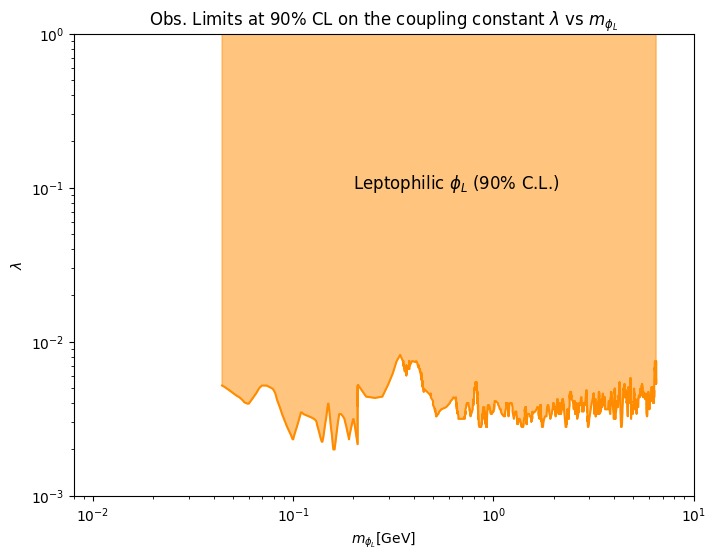

In [66]:
from scipy.interpolate import interp1d
import matplotlib.patches as mpatches


newscalardata = newscalardata.sort_values(by='scalarmass')


common_x_min = max(min(xg2inf), min(xg2sup))
common_x_max = min(max(xg2inf), max(xg2sup))
common_x = np.linspace(common_x_min, common_x_max, num=500)
interp_y1 = interp1d(xg2inf, yg2inf, bounds_error=False, fill_value="extrapolate")
interp_y2 = interp1d(xg2sup, yg2sup, bounds_error=False, fill_value="extrapolate")

common_y1 = interp_y1(common_x)
common_y2 = interp_y2(common_x)

# Crear el gráfico log-log para una curva paramétrica
fig, ax = plt.subplots(figsize=(8, 6))

ax.loglog(newscalardata['scalarmass'], newscalardata['coupling'], marker='none', linestyle='-',color='darkorange')
ax.fill_between(newscalardata['scalarmass'], newscalardata['coupling'], y2=100, where=(newscalardata['coupling'] <= np.max(newscalardata['coupling'])), color='darkorange', alpha=0.5)


ax.text(5**-1, 10**-1, r'Leptophilic $\phi_{L}$ (90% C.L.)', fontsize=12, color='black')

darkorange_patch = mpatches.Patch(color='darkorange', label=r'Leptophilic $\phi_{L}$ 90% C.L.')

ax.set_xlim(5**-3, 10**1)  # Ajusta estos valores según tus datos
ax.set_ylim(10**-3, 10**0)  # Ajusta estos valores según tus datos


# Etiquetas y título
ax.set_xlabel(r'$m_{\phi_{L}}$[GeV]')
ax.set_ylabel(r'$\lambda$')
ax.set_title(r'Obs. Limits at 90% CL on the coupling constant $\lambda$ vs $m_{\phi_{L}}$')

# Mostrar el gráfico
#ax.grid(True, which="both", ls="--")  # Añadir una cuadrícula

plt.savefig('plot_excluded_region_lambda.pdf')

plt.show()
